# Quality Prediction in a Mining

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sn

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split

## Load & Preview Data

In [2]:
# load data to Dataframe

data=pd.read_csv('MiningProcess_Flotation_Plant_Database.csv')

data.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

In [4]:
# Ensure your date column is in datetime format
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data.head(5)

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235","250,576",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532","250,862",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874","250,313",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487","250,049",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136","249,895",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


In [5]:
# Transform , to . and object type from str to float

for dt in data.columns:
    data[dt]=data[dt].str.replace(',','.').astype(float)

In [6]:
data.head(5) 

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [7]:
data.info() #precleaning data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 737453 entries, 2017-03-10 01:00:00 to 2017-09-09 23:00:00
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float64
 1   % Silica Feed                 737453 non-null  float64
 2   Starch Flow                   737453 non-null  float64
 3   Amina Flow                    737453 non-null  float64
 4   Ore Pulp Flow                 737453 non-null  float64
 5   Ore Pulp pH                   737453 non-null  float64
 6   Ore Pulp Density              737453 non-null  float64
 7   Flotation Column 01 Air Flow  737453 non-null  float64
 8   Flotation Column 02 Air Flow  737453 non-null  float64
 9   Flotation Column 03 Air Flow  737453 non-null  float64
 10  Flotation Column 04 Air Flow  737453 non-null  float64
 11  Flotation Column 05 Air Flow  737453 non-null  float64
 12  Flotation 

## Data Exploration 

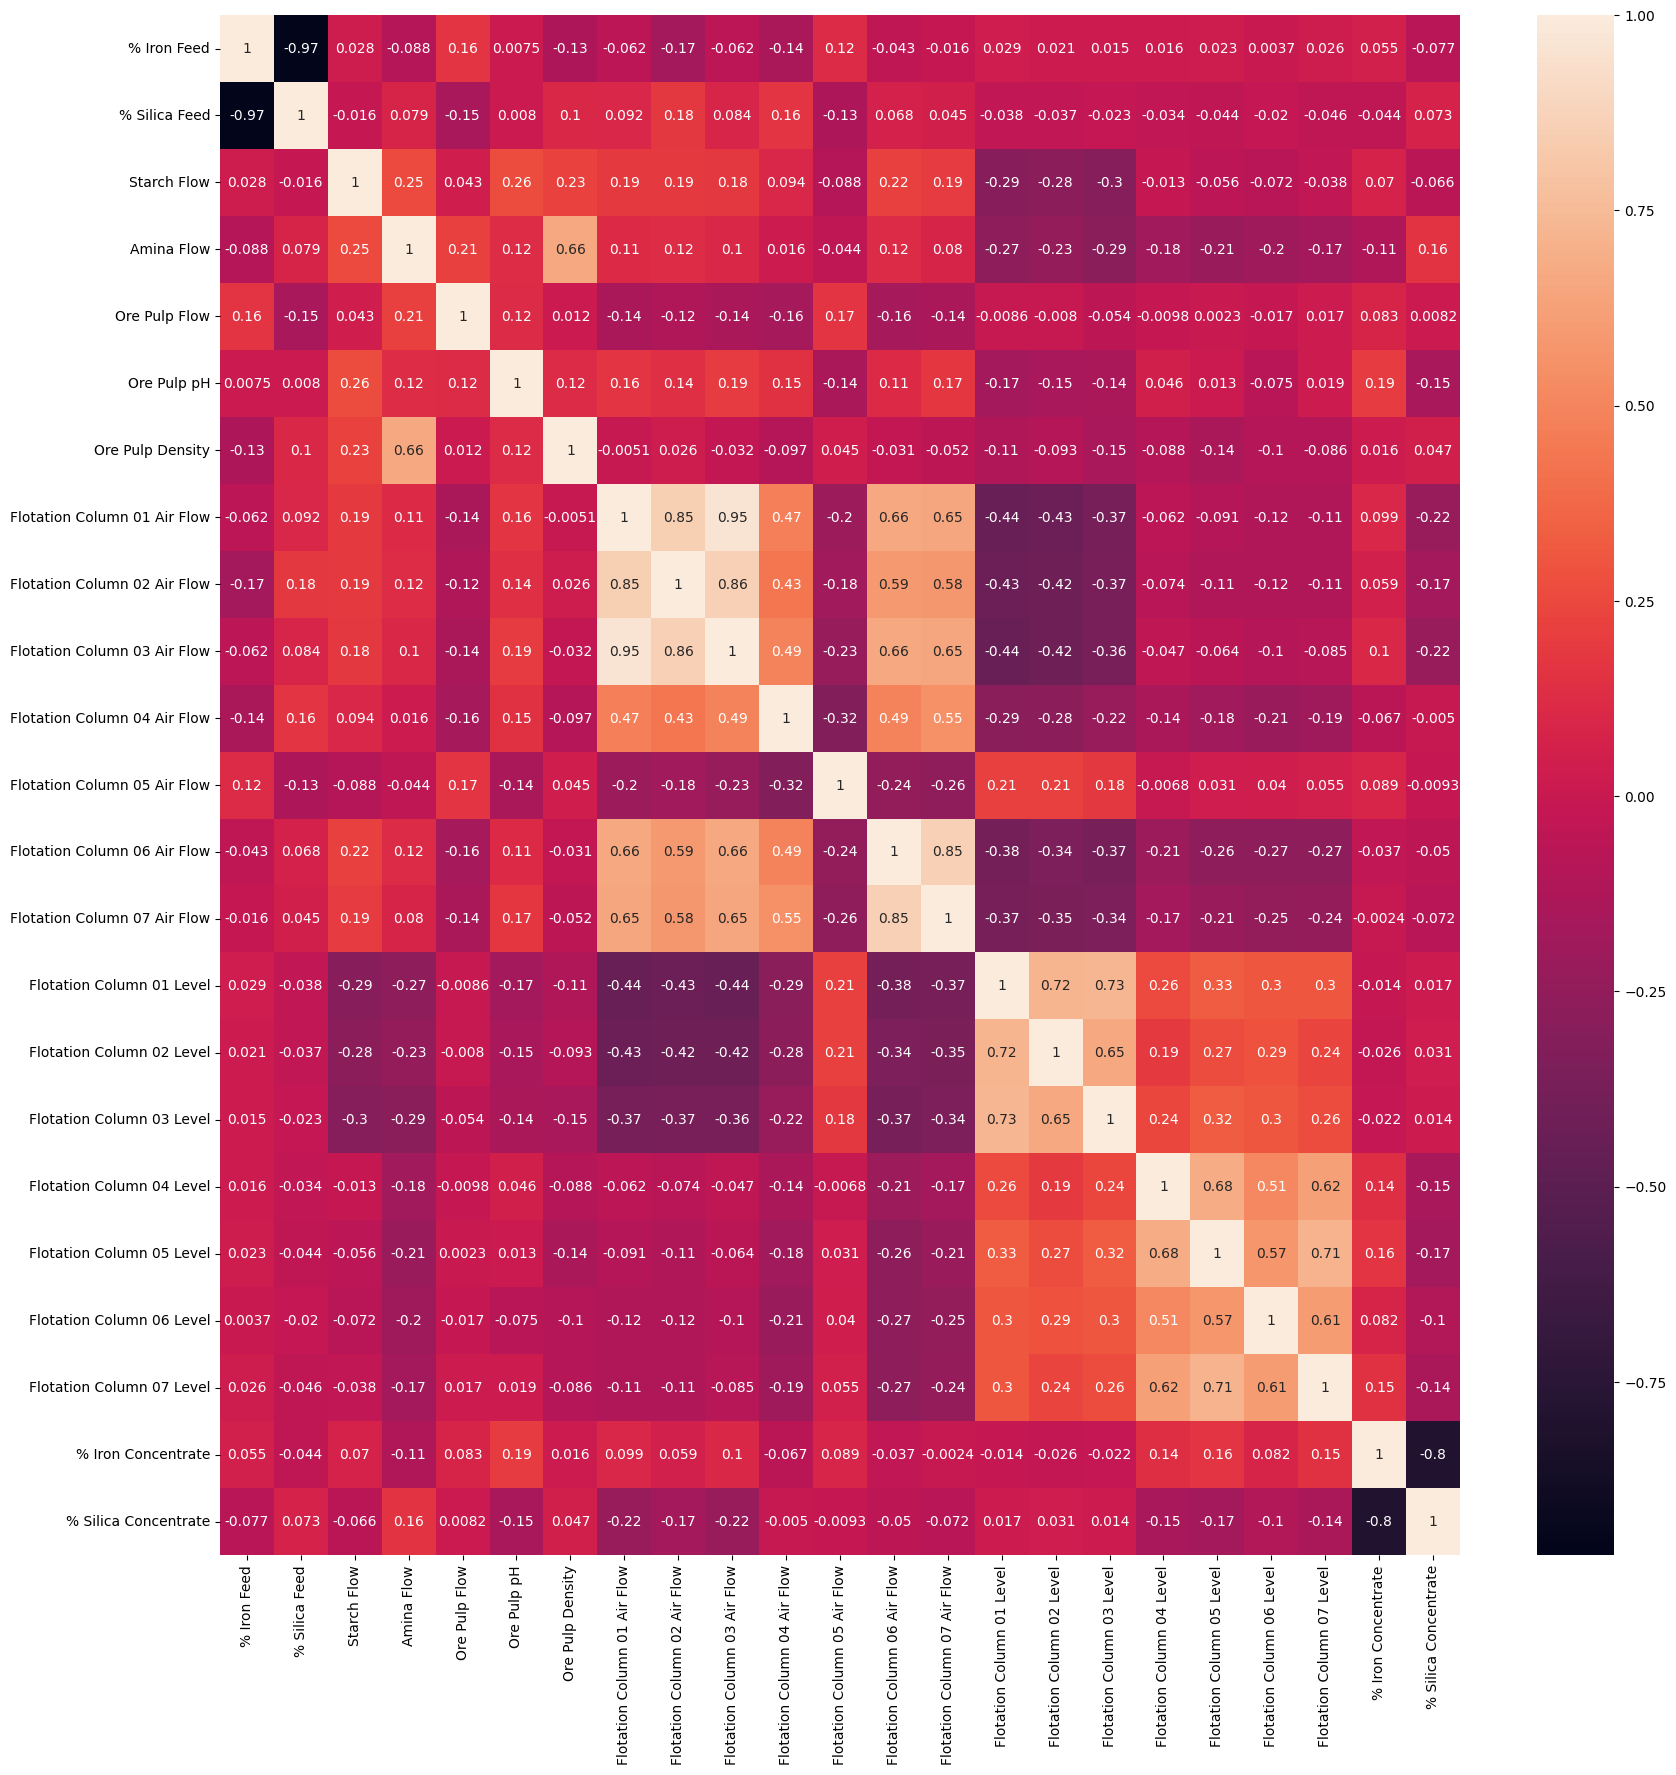

In [8]:
plt.figure(figsize=(20,20))
sn.heatmap(data.corr(), annot=True)
plt.show()

In [9]:
data.columns

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

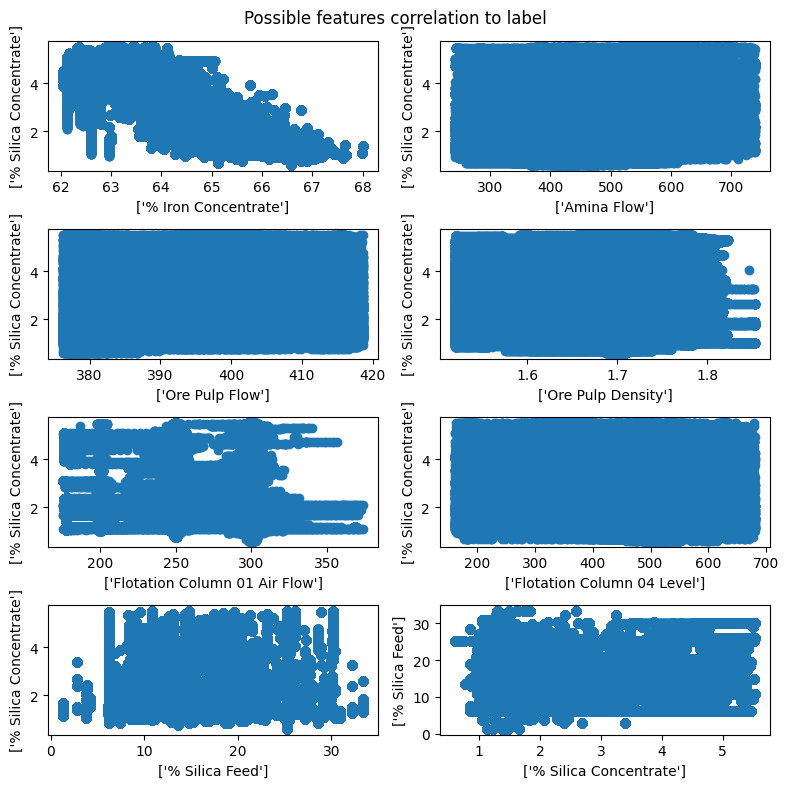

In [10]:
## Feature vs Label Correlation Plot

fig, axs =plt.subplots(4,2,figsize=(8, 8))
fig.suptitle('Possible features correlation to label')


axs[0,0].scatter(data['% Iron Concentrate'],data['% Silica Concentrate'])
axs[0,0].set_xlabel(['% Iron Concentrate'])
axs[0,0].set_ylabel(['% Silica Concentrate'])

axs[0,1].scatter(data['Amina Flow'],data['% Silica Concentrate'])
axs[0,1].set_xlabel(['Amina Flow'])
axs[0,1].set_ylabel(['% Silica Concentrate'])

axs[1,0].scatter(data['Ore Pulp Flow'],data['% Silica Concentrate'])
axs[1,0].set_xlabel(['Ore Pulp Flow'])
axs[1,0].set_ylabel(['% Silica Concentrate'])

axs[1,1].scatter(data['Ore Pulp Density'],data['% Silica Concentrate'])
axs[1,1].set_xlabel(['Ore Pulp Density'])
axs[1,1].set_ylabel(['% Silica Concentrate'])

axs[2,0].scatter(data['Flotation Column 01 Air Flow'],data['% Silica Concentrate'])
axs[2,0].set_xlabel(['Flotation Column 01 Air Flow'])
axs[2,0].set_ylabel(['% Silica Concentrate'])

axs[2,1].scatter(data[ 'Flotation Column 04 Level'],data['% Silica Concentrate'])
axs[2,1].set_xlabel([ 'Flotation Column 04 Level'])
axs[2,1].set_ylabel(['% Silica Concentrate'])


axs[3,0].scatter(data['% Silica Feed'],data['% Silica Concentrate'])
axs[3,0].set_xlabel(['% Silica Feed'])
axs[3,0].set_ylabel(['% Silica Concentrate'])


axs[3,1].scatter(data['% Silica Concentrate'],data['% Silica Feed'])
axs[3,1].set_xlabel(['% Silica Concentrate'])
axs[3,1].set_ylabel(['% Silica Feed'])


plt.tight_layout()

In [11]:
data.columns
droplist=['% Iron Feed','Starch Flow',\
          'Ore Pulp pH','Flotation Column 02 Air Flow',\
          'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',\
          'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',\
          'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
          'Flotation Column 02 Level', 'Flotation Column 03 Level', 'Flotation Column 05 Level',
          'Flotation Column 06 Level', 'Flotation Column 07 Level','% Iron Concentrate']

data_cl=data.drop(droplist,axis=1)
data_cl.shape

(737453, 7)

In [12]:
# Action2 : Polynomial Feature Engineering for 

# data_cl['% Iron Concentrate_power2']=data_cl['% Iron Concentrate']**2

data_cl

,% Silica Feed,Amina Flow,Ore Pulp Flow,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 04 Level,% Silica Concentrate
date,,,,,,,
2017-03-10 01:00:00,16.98,557.434,395.713,1.74000,249.214,443.558,1.31
2017-03-10 01:00:00,16.98,563.965,397.383,1.74000,249.719,448.086,1.31
2017-03-10 01:00:00,16.98,568.054,399.668,1.74000,249.741,449.688,1.31
2017-03-10 01:00:00,16.98,568.665,397.939,1.74000,249.917,446.210,1.31
2017-03-10 01:00:00,16.98,558.167,400.254,1.74000,250.203,453.670,1.31
...,...,...,...,...,...,...,...
2017-09-09 23:00:00,23.20,441.052,386.570,1.65365,302.344,418.725,1.71
2017-09-09 23:00:00,23.20,473.436,384.939,1.65352,303.013,418.377,1.71
2017-09-09 23:00:00,23.20,500.488,383.496,1.65338,303.662,419.531,1.71


## Training & Selection Regression Model

In [13]:
data_cl.columns

Index(['% Silica Feed', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 04 Level',
       '% Silica Concentrate'],
      dtype='object')

In [14]:
## Split data to training set and test set 

from sklearn.model_selection import train_test_split

X=data_cl.drop('% Silica Concentrate',axis=1)

y=data_cl['% Silica Concentrate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y.shape)
print(y_train.shape)
print(y_test.shape)

(737453,)
(589962,)
(147491,)


In [15]:
# normalize the training data 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_train_norm,axis=0)}")

Peak to Peak range by column in Raw        X:% Silica Feed                    32.09000
Amina Flow                      497.83500
Ore Pulp Flow                    42.39200
Ore Pulp Density                  0.33343
Flotation Column 01 Air Flow    198.31300
Flotation Column 04 Level       518.13900
dtype: float64
Peak to Peak range by column in Normalized X:[4.71237465 5.45648833 4.36995836 4.81436396 6.69849509 5.64380306]


In [16]:
# Define Validation Function

from sklearn.model_selection import cross_validate

def model_trainval(model,x,y):
    
    scoring = ['neg_root_mean_squared_error', 'r2']
    scores = cross_validate(model, x, y, scoring=scoring)
    RMSE = scores['test_neg_root_mean_squared_error'].mean()
    R2 = scores['test_r2'].mean()
    print("Result of Model Validation")
    print(f"RMSE : {RMSE}")
    print(f"R2 :{R2}")
    
    return RMSE,R2

In [17]:
### Linear Regression Model with Regularization Term (Lassso)

from sklearn.linear_model import Lasso

reg1=Lasso(alpha=0.001)

## Model Training & Cross Validation

[RMSE, R2]=model_trainval(reg1,X_train_norm,y_train)

RMSE_Col=[]
R2_Col=[]

RMSE_Col.append(RMSE)
R2_Col.append(R2)

Result of Model Validation
RMSE : -1.0560710048187336
R2 :0.12017562929060206


In [18]:
### Linear Regression Model with Regularization Term (Ridge Model)

from sklearn.linear_model import Ridge

reg2=Ridge(alpha=0.001)

## Model Training & Cross Validation

[RMSE,R2]=model_trainval(reg2,X_train_norm,y_train)

RMSE_Col.append(RMSE)
R2_Col.append(R2)

Result of Model Validation
RMSE : -1.0560649433858527
R2 :0.12018569675955026


In [19]:
### Random Forest Tree Model

from sklearn.ensemble import RandomForestRegressor

reg3=RandomForestRegressor(max_depth=10,n_estimators=10)

## Model Training & Cross Validation

[RMSE,R2]=model_trainval(reg3,X_train_norm,y_train)

RMSE_Col.append(RMSE)
R2_Col.append(R2)

Result of Model Validation
RMSE : -0.8145106354509343
R2 :0.47661850912963877


In [20]:
reg3.fit(X_train_norm,y_train)

RandomForestRegressor(max_depth=10, n_estimators=10)

In [21]:
print(RMSE_Col,R2_Col)

[-1.0560710048187336, -1.0560649433858527, -0.8145106354509343] [0.12017562929060206, 0.12018569675955026, 0.47661850912963877]


<function matplotlib.pyplot.show(close=None, block=None)>

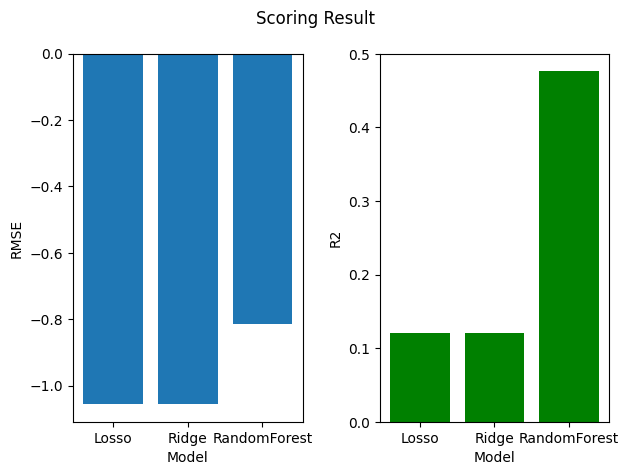

In [22]:
# plot graph performance comparison each pre-selected model 

Xgraph=['Losso','Ridge','RandomForest']

fig,axes=plt.subplots(nrows=1,ncols=2)

fig.suptitle("Scoring Result")
axes[0].bar(Xgraph,RMSE_Col)
axes[0].set_xlabel("Model")
axes[0].set_ylabel("RMSE")

axes[1].bar(Xgraph,R2_Col,color='g')
axes[1].set_xlabel("Model")
axes[1].set_ylabel("R2")

plt.tight_layout()
plt.show

## Model Testing (before deployment)

In [23]:
# normalize the test data 

scaler = StandardScaler()
X_test_norm = scaler.fit_transform(X_test)


## Prediction
y_pred=reg3.predict(X_test_norm)

## Evaluation 

from sklearn.metrics import mean_squared_error, r2_score

RMSE_Testing=mean_squared_error(y_test,y_pred)
R2_Testing=r2_score(y_test,y_pred)

print(f"RMSE of test result : {RMSE_Testing} ")
print(f"R2 of test result : {R2_Testing} ")

RMSE of test result : 0.7048524172227753 
R2 of test result : 0.4422854325994813 


In [24]:
#Built Dataframe for test result

result_label=pd.DataFrame()

result_label['% silica concentrate']=y_test
result_label['predicted % silica concentrate']=y_pred

In [25]:
print(result_label.reset_index().head(50))

                  date  % silica concentrate  predicted % silica concentrate
0  2017-05-08 07:00:00              3.540000                        3.218679
1  2017-03-14 09:00:00              1.300000                        3.453280
2  2017-03-14 12:00:00              2.080000                        2.868357
3  2017-08-12 21:00:00              1.450000                        1.563662
4  2017-03-11 09:00:00              2.970000                        2.233869
5  2017-05-30 00:00:00              1.180000                        1.424035
6  2017-05-26 16:00:00              1.570000                        2.099826
7  2017-08-10 09:00:00              5.520000                        2.180324
8  2017-07-30 18:00:00              2.920000                        2.264594
9  2017-04-22 22:00:00              4.927199                        3.838977
10 2017-04-23 04:00:00              4.501191                        3.838977
11 2017-03-30 17:00:00              4.280000                        4.607368